In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cervica_cancer.csv")
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,...,?,?,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0.08,0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [4]:
# ? 값을 포함하고 있는 컬럼 찾기 
for feature in data.columns:
    numq = len(data[data[feature]=='?'])
    if numq!=0:
        print(feature, numq)

Number of sexual partners 26
First sexual intercourse 7
Num of pregnancies 56
Smokes 13
Smokes (years) 13
Smokes (packs/year) 13
Hormonal Contraceptives 108
Hormonal Contraceptives (years) 108
IUD 117
IUD (years) 117
STDs 105
STDs (number) 105
STDs:condylomatosis 105
STDs:cervical condylomatosis 105
STDs:vaginal condylomatosis 105
STDs:vulvo-perineal condylomatosis 105
STDs:syphilis 105
STDs:pelvic inflammatory disease 105
STDs:genital herpes 105
STDs:molluscum contagiosum 105
STDs:AIDS 105
STDs:HIV 105
STDs:Hepatitis B 105
STDs:HPV 105
STDs: Time since first diagnosis 787
STDs: Time since last diagnosis 787


In [5]:
# 통일성을 위해 ? => median으로 대체
for feature in data.columns:
    data[feature].replace('?',np.nan,inplace=True )
    data[feature].fillna(value=0,inplace=True)
for feature in data.columns:
    data[feature].replace(0,data[feature].median(),inplace=True)

In [6]:
data['Number of sexual partners'] = data['Number of sexual partners'].astype('int64')
data['First sexual intercourse'] = data['First sexual intercourse'].astype('int64')
data['Num of pregnancies'] = data['Num of pregnancies'].astype('int64')
data['Smokes (years)'] = data['Smokes (years)'].astype('float')
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].astype('float')
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].astype('float')
data['IUD (years)'] = data['IUD (years)'].astype('float')
data['STDs (number)'] = data['STDs (number)'].astype('int64')
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].astype('int64')
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].astype('int64')
data['Dx:Cancer'] = data['Dx:Cancer'].astype('object')
data['Dx:CIN'] = data['Dx:CIN'].astype('object')
data['Dx:HPV'] = data['Dx:HPV'].astype('object')
data['Dx'] = data['Dx'].astype('category').astype('object')
data['Hinselmann'] = data['Hinselmann'].astype('object')
data['Schiller'] = data['Schiller'].astype('object')
data['Citology'] = data['Citology'].astype('object')
data['Biopsy'] = data['Biopsy'].astype('object')

data.dtypes

Age                                     int64
Number of sexual partners               int64
First sexual intercourse                int64
Num of pregnancies                      int64
Smokes                                 object
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                object
Hormonal Contraceptives (years)       float64
IUD                                    object
IUD (years)                           float64
STDs                                   object
STDs (number)                           int64
STDs:condylomatosis                    object
STDs:cervical condylomatosis           object
STDs:vaginal condylomatosis            object
STDs:vulvo-perineal condylomatosis     object
STDs:syphilis                          object
STDs:pelvic inflammatory disease       object
STDs:genital herpes                    object
STDs:molluscum contagiosum             object
STDs:AIDS                         

In [7]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.00,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0.0,0.0,1,8.00,0,...,0,0,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0.0,0.0,1,0.08,0,...,0,0,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0.0,0.0,1,0.08,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Dx:Cancer', ylabel='Smokes (years)'>

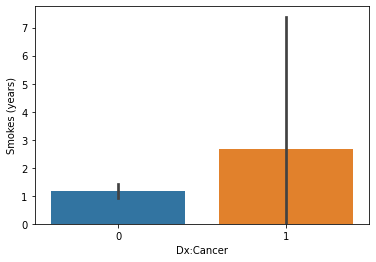

In [8]:
sns.barplot(x="Dx:Cancer", y="Smokes (years)", data=data)

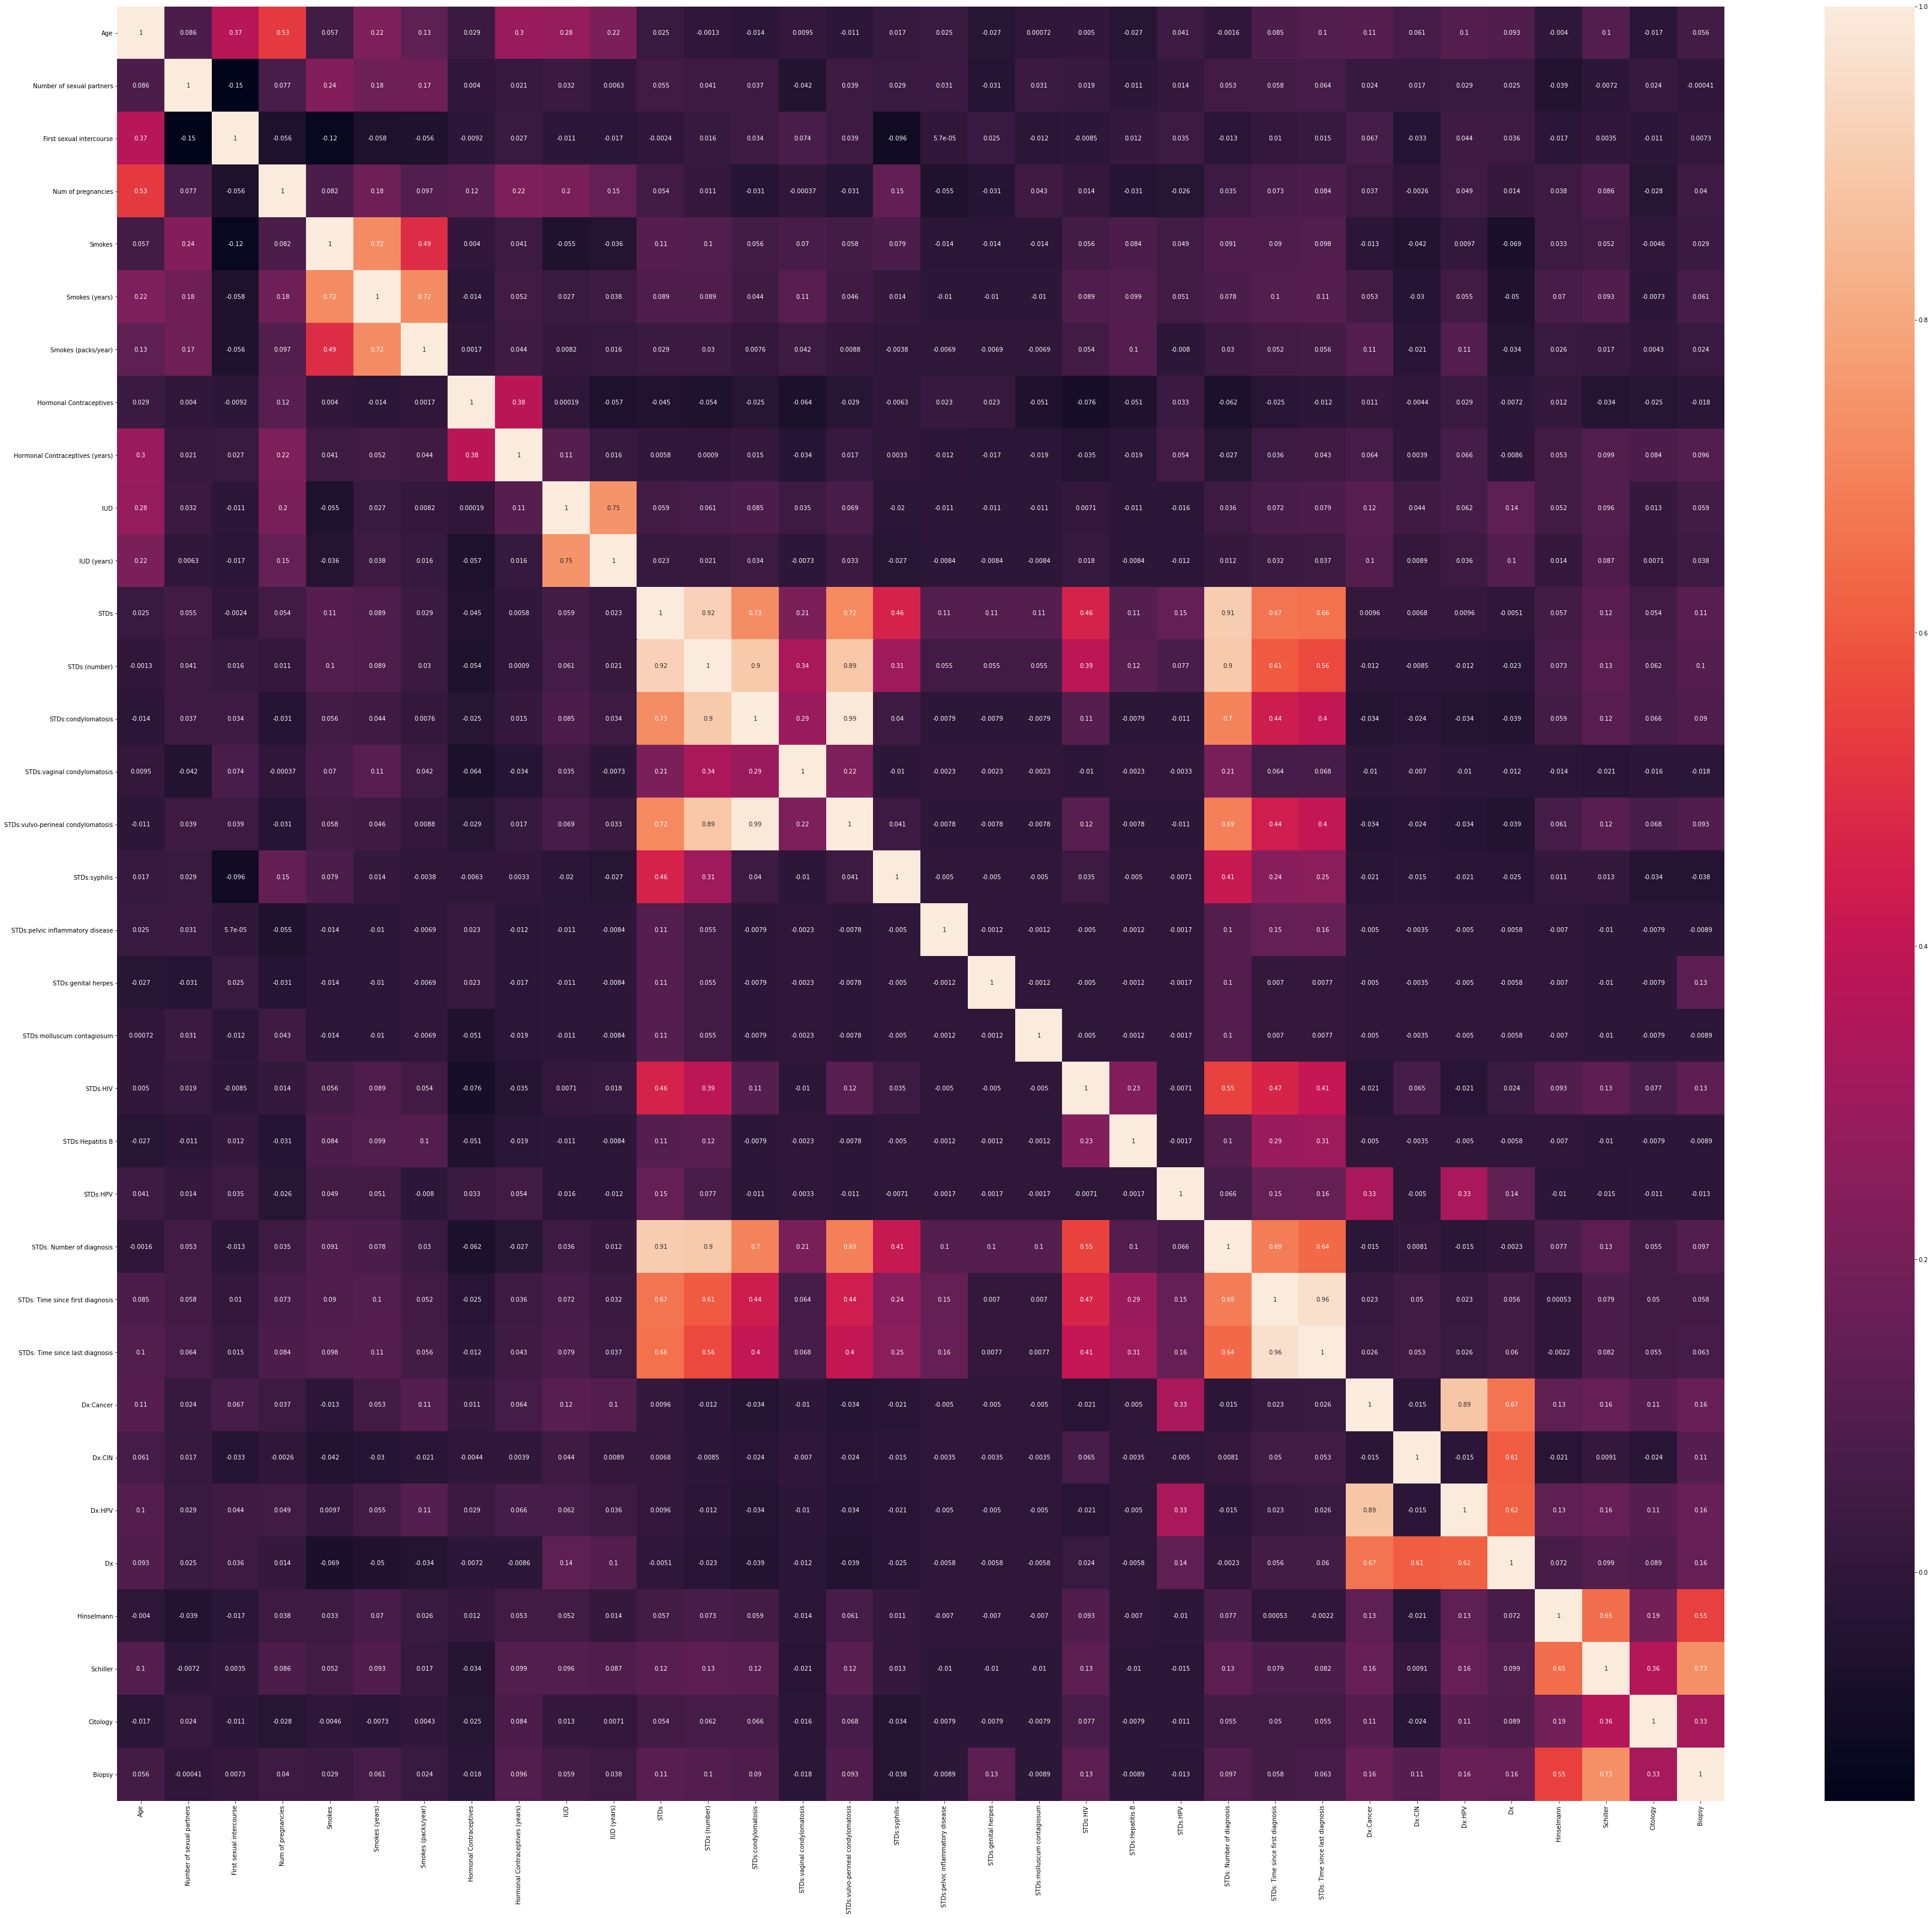

In [9]:
heatmap_data = data.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1)
heatmap_data
plt.figure(figsize=(60, 55))
sns.heatmap(heatmap_data.astype(float).corr(), annot=True)
plt.show()

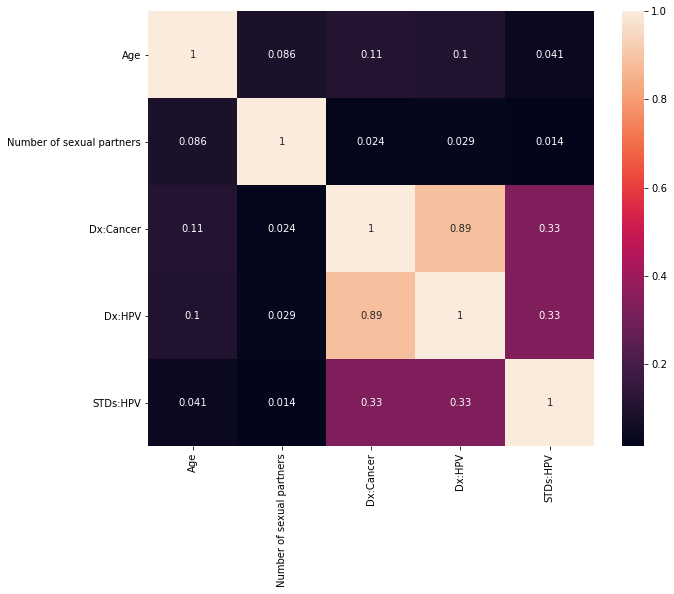

In [28]:
heatmap_data2 = data[["Age", "Number of sexual partners", "Dx:Cancer", "Dx:HPV", "STDs:HPV"]]
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data2.astype(float).corr(), annot=True)
plt.show()

In [11]:
# plt.figure(figsize=(30, 30))
# sns.pairplot(heatmap_data.astype(float).corr())
# plt.show()

/Users/dan_bibibi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


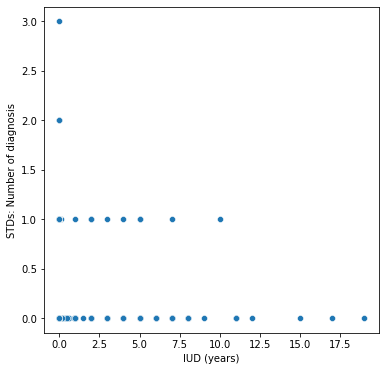

In [12]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data["IUD (years)"], data["STDs: Number of diagnosis"], palette='coolwarm')
plt.show()

/Users/dan_bibibi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


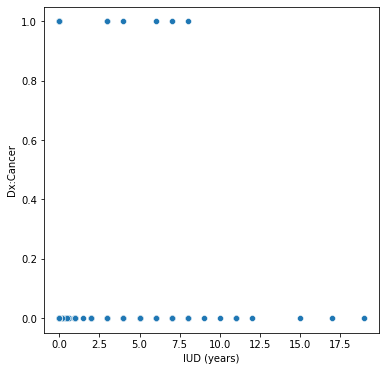

In [13]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data["IUD (years)"], data["Dx:Cancer"], palette='coolwarm')
plt.show()

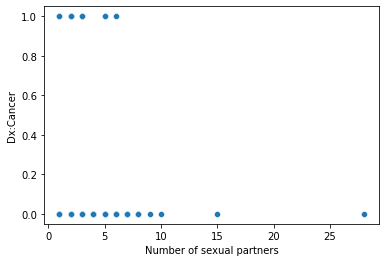

In [18]:
sns.scatterplot(x="Number of sexual partners", y="Dx:Cancer", data=data);

<AxesSubplot:xlabel='Dx:Cancer', ylabel='Number of sexual partners'>

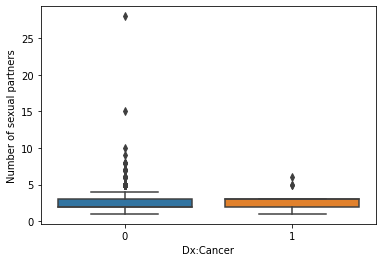

In [34]:
sns.boxplot(x=data["Dx:Cancer"], y=data["Number of sexual partners"])

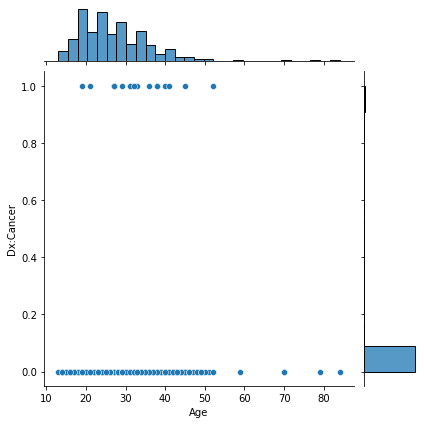

In [37]:
sns.jointplot(x="Age", y="Dx:Cancer", data=data)